# Uczenie maszynowe
## Lista 2: Optymalizacja przy pomocy Algorytmów Genetycznych

**Autor:** Patryk Rygiel (250080)  
**GitHub:** https://github.com/PatRyg99/ML-PWR-2022

In [1]:
from src.problems.problem import Problem
from src.heuristics.genetic_algorithm import GeneticAlgorithm
from src.heuristics.greedy_search import GreedySearch
from src.heuristics.random_search import RandomSearch

from src.benchmark import benchmark_params, benchmark_probs
from src.plot import plot_benchmark_params, plot_benchmark_probs

# 0. Wstęp

Jako problem rozważany na tej liście wybrany został TSP. Problem ten może zostać zdefiniowany na dwa różne sposoby: (i) ścieżka hamiltonowska; (ii) cykl hamiltonowski. W rozwiązaniach na tej liście rozwiażamy cykl hamiltonowski, zatem jako poprawne rozwiązanie uważamy ścieżkę odwiedzającą każdy wierzchołek jeden raz oraz wracającą z ostatniego wierzchołka do wierzchołka początkowego.

# 1. Demo uruchamiania heurystyk dla różnych problemów i parametrów

## 1.1. Załadowanie problemu

In [2]:
problem = Problem.load_from_name("KROA100")

----------------------------------------------
Loaded problem: KROA100
DIMENSION = 100
MINIMAL_LENGTH = 21285.44318157108
----------------------------------------------



## 1.2. Random search demo (losowe przeszukiwanie)

### a) Pojedyncze wykonanie heurystyki

In [3]:
ITERS = 10_000

random_search = RandomSearch(problem, ITERS)
random_search.run()

Running problem: KROA100


Best fitness: 137612.11635873583


### b) Wielokrotne wykonanie heurystyki

In [4]:
random_search.run_repeat(3)

Repeat [1/3]: 138852.02416694473
Repeat [2/3]: 139494.53954638515
Repeat [3/3]: 138388.08052785063


## 1.3. Greedy search demo (zachłanne przeszukiwanie)

### a) Pojedyncze wykonanie heurystyki

In [5]:
greedy_search = GreedySearch(problem)
greedy_search.run()

Running problem: KROA100


Best fitness: 24698.49657976497


### b) Wielokrotne wykonanie heurystyki

Heurystyka zachłanna jest deterministyczna, zatem nie ma potrzeby puszczania jej wielokrotnie, gdyż zawsze znajduje ona to samo optimum lokalne.

In [6]:
greedy_search.run_repeat(3)

Repeat [1/3]: 24698.49657976497
Repeat [2/3]: 24698.49657976497
Repeat [3/3]: 24698.49657976497


## 1.4. Genetic algorithm demo (algorytm genetyczny)

### a) Pojedyncze wykonanie heurystyki

Running problem: KROA100


Best fitness: 22649.261062968442


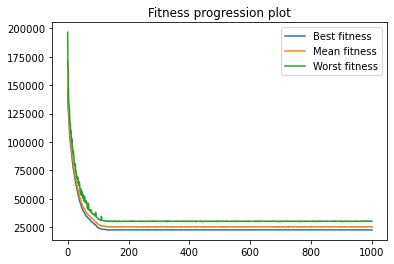

In [7]:
TOUR = 250
POP_SIZE = 500
GENERATIONS = 1000

ga = GeneticAlgorithm(problem, GENERATIONS, POP_SIZE, TOUR)
ga.run()

### b) Wielokrotne wykonanie heurystyki

In [8]:
ga.run_repeat(3)

Repeat [1/3]: 22307.949955412565
Repeat [2/3]: 23845.24406785964
Repeat [3/3]: 23531.167013710034


# 2. Eksperymenty i wyniki

Dane, na których wykonywane będą eksperymenty w tej sekcji zostały pobrane z bazy danych problemów TSP Uniwersytetu w Heidelbergu (http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/). Z bazy zostały wybrane problemy, które były zapisane w formie lokalizacji $(x, y)$ dla każdego z przystanków - ok. 5 problemów było zapisanych w formie różnych typów macierzy sąsiedztwa (pełne, górne trójkątne itp.), zostały one pominięte ze względu na trudność ekstrakcji danych. Dodatkowo pominięte zostały problemy nie posiadające pliku z optymalnym rozwiązaniem. Dla każdego z pozostałych problemów na podstawie koordynatów przystanków i optymalnego rozwiązania, policzone zostały macierze sąsiedztwa oraz koszt minimalnego rozwiązania. 

Pobrane problemy:
```
A280       CH150     EIL76      GR202  KROC100  PR1002   RD100      
ULYSSES22  ATT48     DANTZIG42  FIVE   GR666    KROD100  PR2392   
ST70       BERLIN52  EIL101     FRI26  GR96     LIN105   PR76     
TSP225     CH130     EIL51      GR17   KROA100  PCB442   ULYSSES16
```

Dane nie zostały umieszczone na repozytorium ze względu na ich duży rozmiar. Wygląd plików jest przedstawiony poniżej na podstawie problemu FIVE:
* `info.yaml` - zawiera nazwę problemu oraz długość optymalnego rozwiązania

```
DIMENSION: 5
MINIMAL_LENGTH: 19
```

* `five_d.txt` - zawiera macierz sąsiedztwa problemu

```
0.0  3.0  4.0  2.0  7.0
3.0  0.0  4.0  6.0  3.0
4.0  4.0  0.0  5.0  8.0
2.0  6.0  5.0  0.0  6.0
7.0  3.0  8.0  6.0  0.0
```

## 2.1. Rozważane problemy

Z wcześniej pobranych problemów wybrane zostało $4$ z nich o różnej wielkości w celu benchmarkowania badanych heurystyk. Wielkości problemów kolejno:
 26, 52, 100, 225.

In [3]:
problem_names = ["FRI26", "BERLIN52", "KROA100", "TSP225"]
problems = [Problem.load_from_name(problem_name) for problem_name in problem_names]

----------------------------------------------
Loaded problem: FRI26
DIMENSION = 26
MINIMAL_LENGTH = 937
----------------------------------------------
----------------------------------------------
Loaded problem: BERLIN52
DIMENSION = 52
MINIMAL_LENGTH = 7544.365901904087
----------------------------------------------
----------------------------------------------
Loaded problem: KROA100
DIMENSION = 100
MINIMAL_LENGTH = 21285.44318157108
----------------------------------------------
----------------------------------------------
Loaded problem: TSP225
DIMENSION = 225
MINIMAL_LENGTH = 3859.0
----------------------------------------------


## 2.2. Random Search: zebranie wyników

In [3]:
for problem in problems:
    random_search = RandomSearch(problem, 10_000)
    random_search.run_repeat(100, f".results/{problem.name}")

PR2392: 100%|██████████| 100/100 [00:14<00:00,  6.78it/s, best=1.47e+7]


## 2.3. Greedy Search: zebranie wyników

In [4]:
for problem in problems:
    random_search = GreedySearch(problem)
    random_search.run_repeat(100, f".results/{problem.name}")

PR2392: 100%|██████████| 100/100 [35:27<00:00, 21.28s/it, best=4.59e+5]


## 2.4. Algorytm genetyczny: strojenie parametrów

#### a) `FRI26`

In [10]:
problem = Problem.load_from_name("FRI26")

----------------------------------------------
Loaded problem: FRI26
DIMENSION = 26
MINIMAL_LENGTH = 937
----------------------------------------------


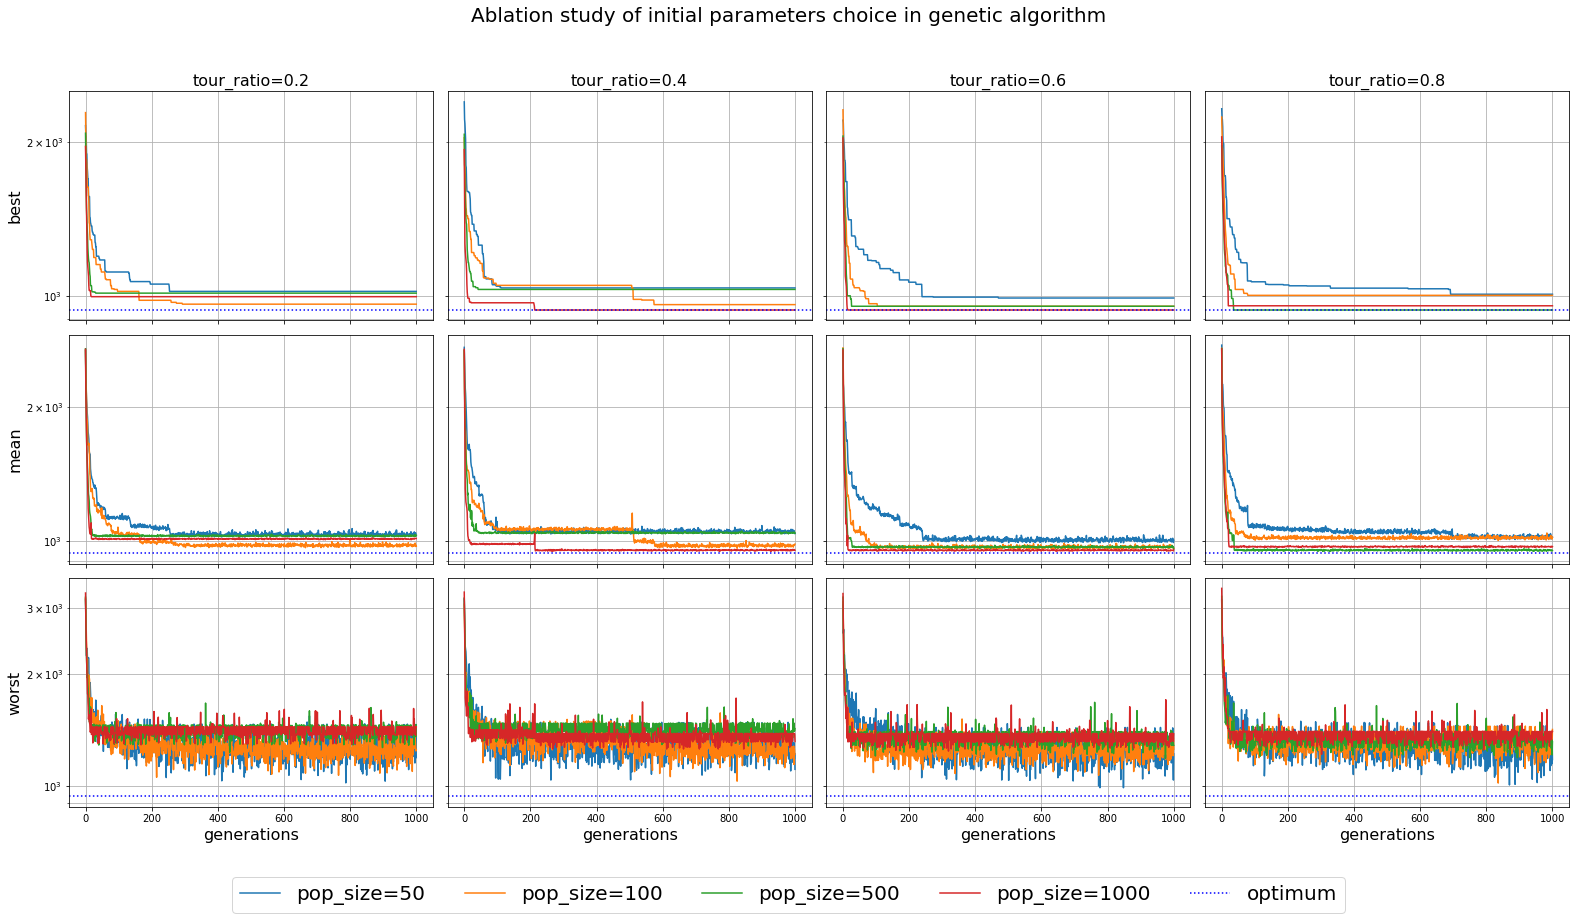

In [11]:
GENERATIONS = 1000
POP_SIZE = [50, 100, 500, 1000]
TOUR_RATIO = [0.2, 0.4, 0.6, 0.8]

# Results already collected
# benchmark_params(problem, GENERATIONS, POP_SIZE, TOUR_RATIO, csv_path=".results/benchmark-params/")
plot_benchmark_params(f".results/benchmark-params/{problem.name}.csv", optimum=problem.minimal_length)

100%|██████████| 16/16 [00:14<00:00,  1.07it/s]


Saved benchmark data at: .results/benchmark-probs/FRI26.csv


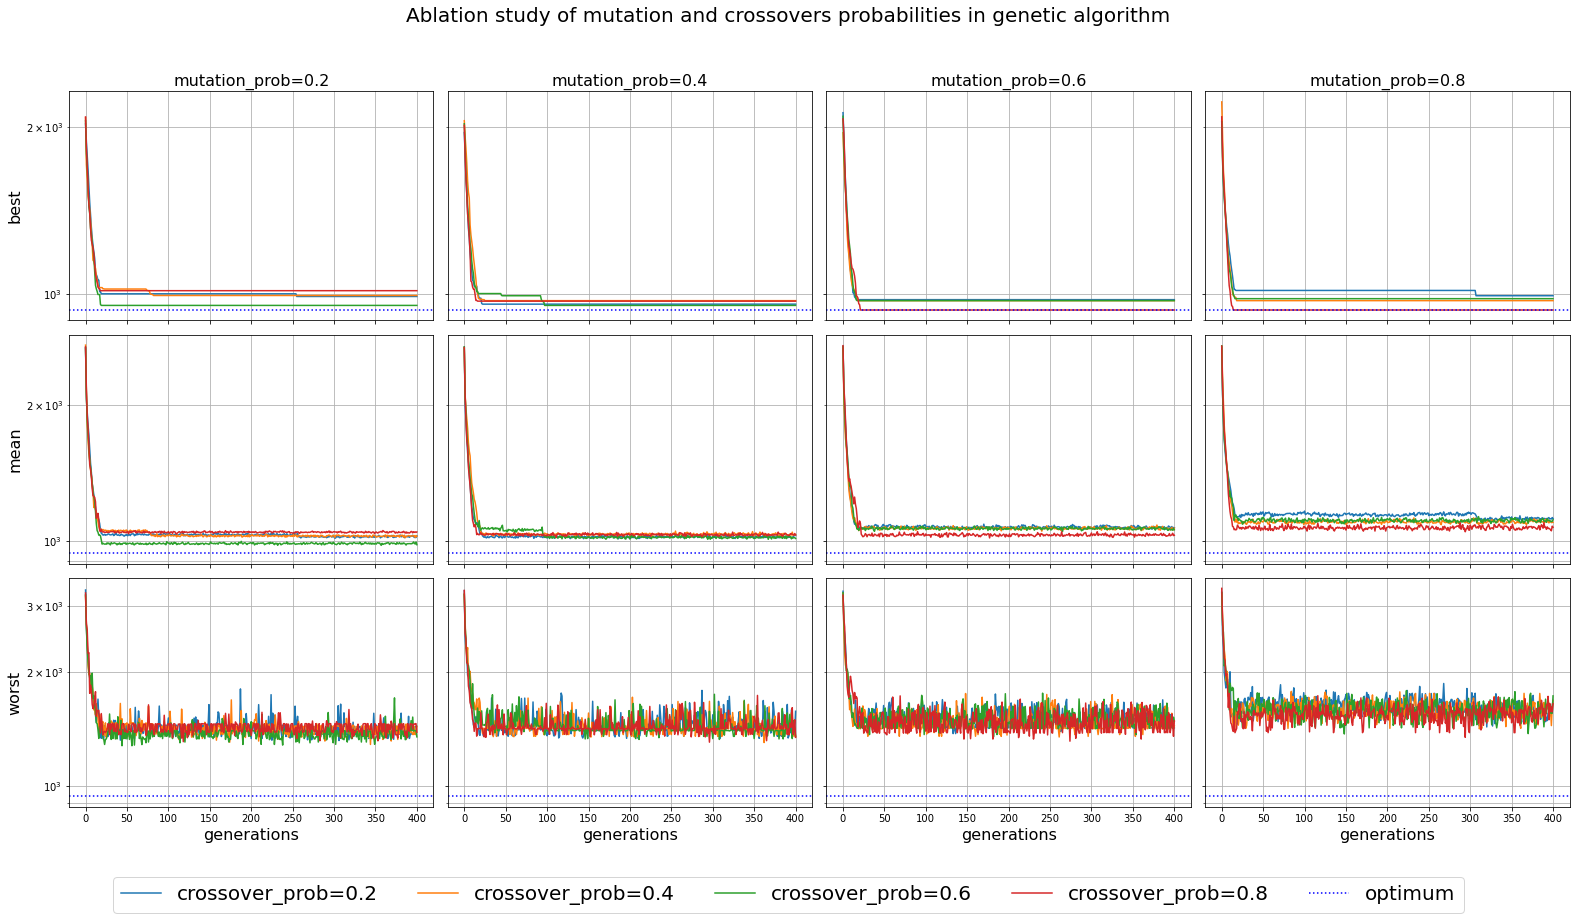

In [12]:
GENERATIONS = 400
POP_SIZE = 500
TOUR_RATIO = 0.6

mutation_probs = [0.2, 0.4, 0.6, 0.8]
crossover_probs = [0.2, 0.4, 0.6, 0.8]

# Results already collected
# benchmark_probs(problem, GENERATIONS, POP_SIZE, TOUR_RATIO, mutation_probs, crossover_probs, csv_path=".results/benchmark-probs/")
plot_benchmark_probs(f".results/benchmark-probs/{problem.name}.csv", optimum=problem.minimal_length)

#### b) `BERLIN52`

In [13]:
problem = Problem.load_from_name("BERLIN52")

----------------------------------------------
Loaded problem: BERLIN52
DIMENSION = 52
MINIMAL_LENGTH = 7544.365901904087
----------------------------------------------


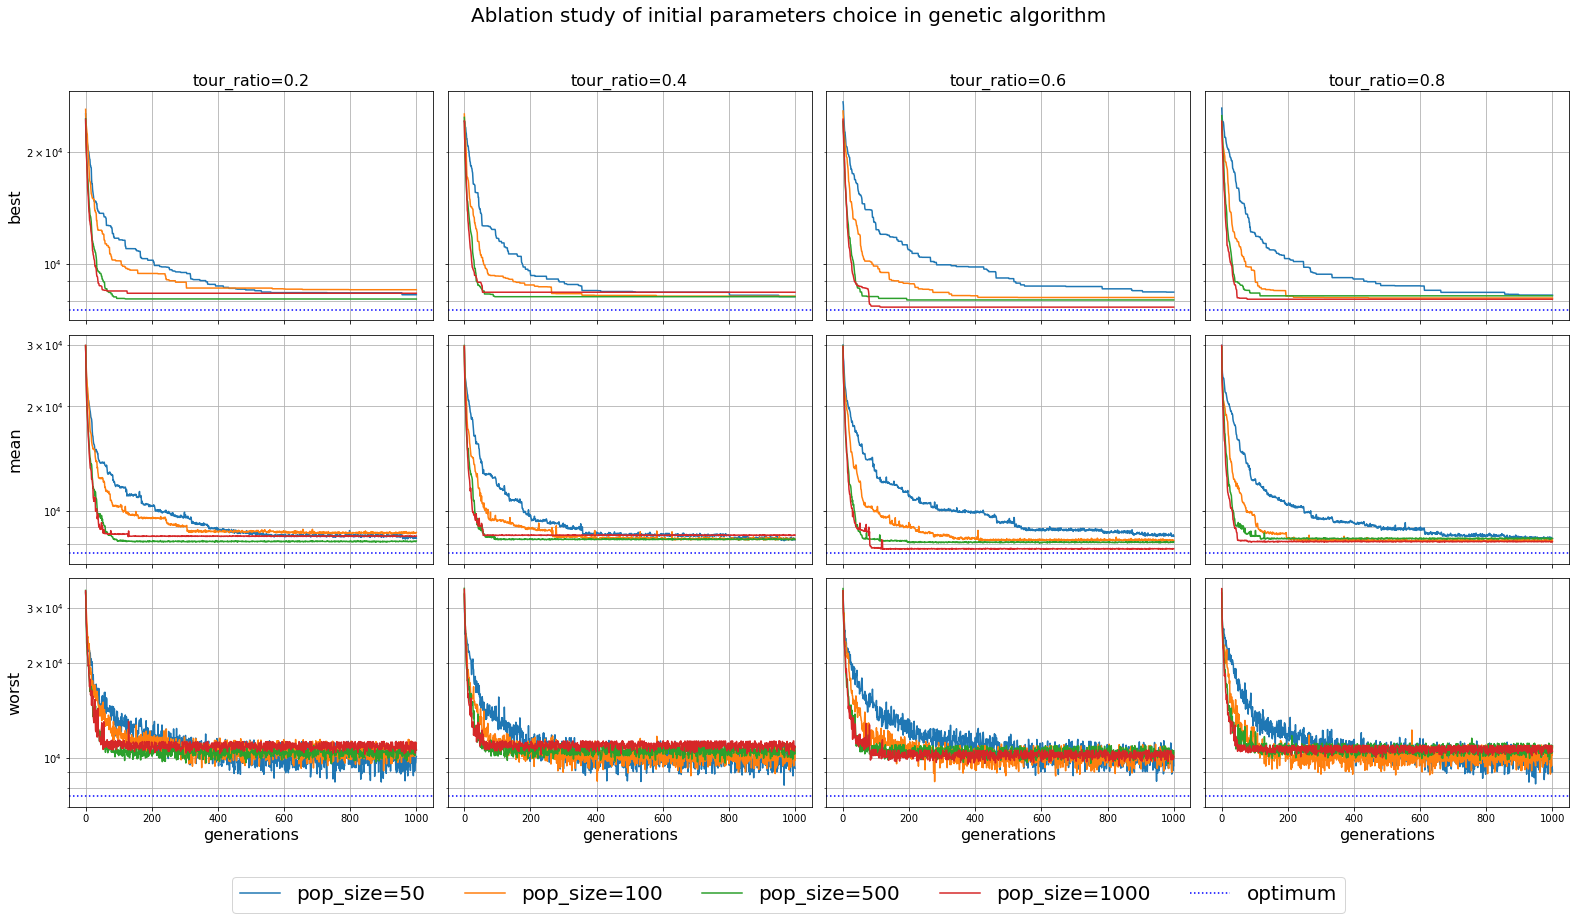

In [14]:
GENERATIONS = 1000
POP_SIZE = [50, 100, 500, 1000]
TOUR_RATIO = [0.2, 0.4, 0.6, 0.8]

# Results already collected
# benchmark_params(problem, GENERATIONS, POP_SIZE, TOUR_RATIO, csv_path=".results/benchmark-params/")
plot_benchmark_params(f".results/benchmark-params/{problem.name}.csv", optimum=problem.minimal_length)

100%|██████████| 16/16 [01:42<00:00,  6.40s/it]


Saved benchmark data at: .results/benchmark-probs/BERLIN52.csv


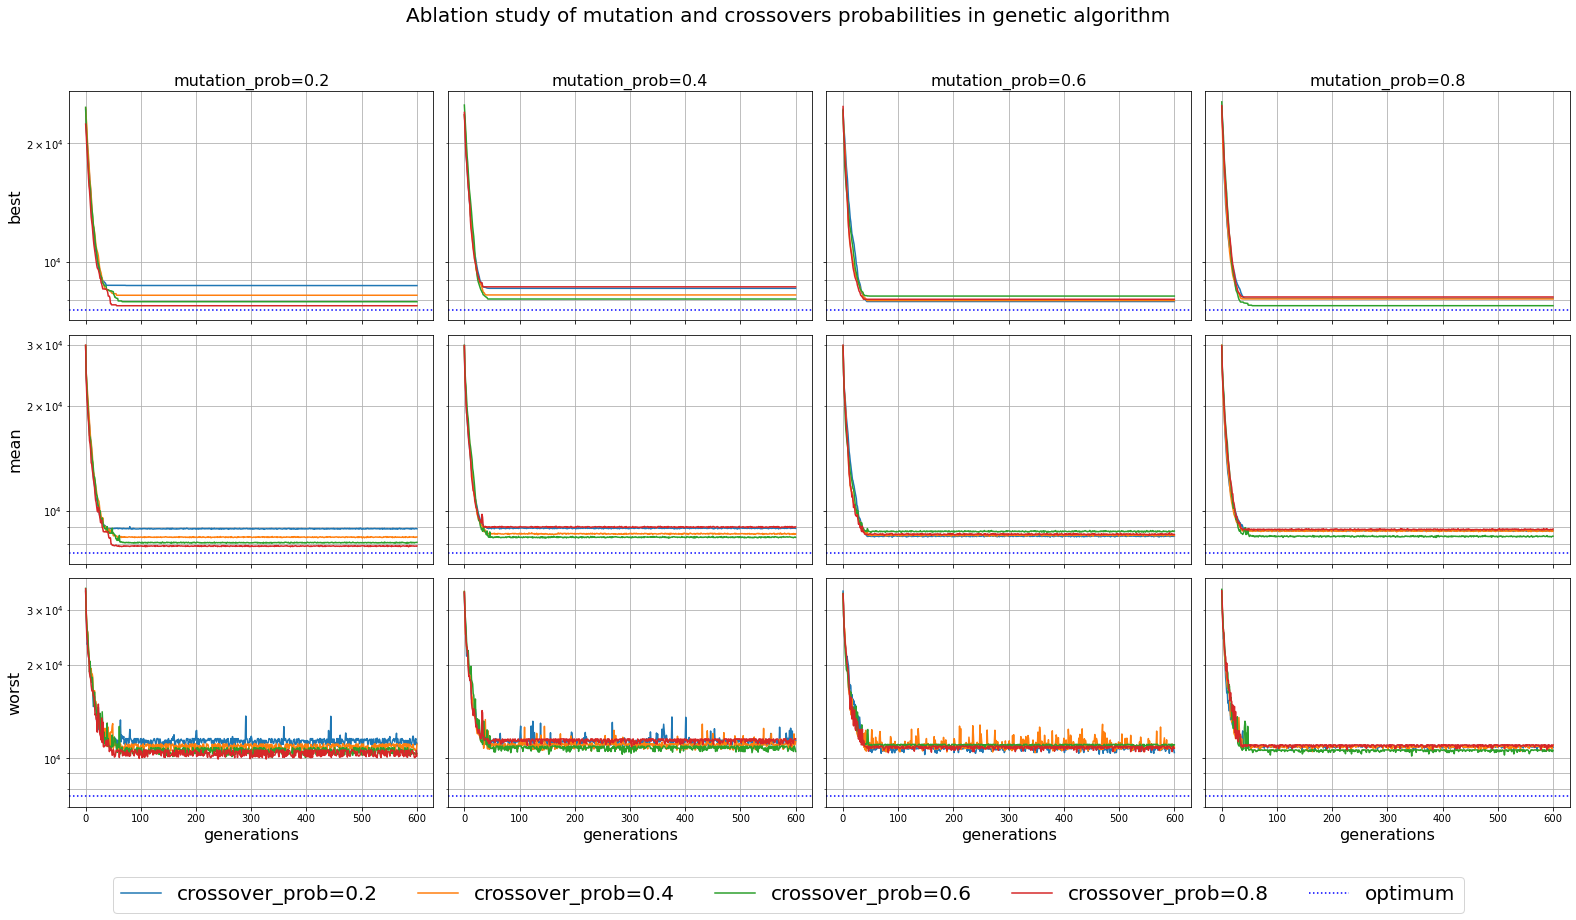

In [15]:
GENERATIONS = 600
POP_SIZE = 1000
TOUR_RATIO = 0.6

mutation_probs = [0.2, 0.4, 0.6, 0.8]
crossover_probs = [0.2, 0.4, 0.6, 0.8]

# Results already collected
# benchmark_probs(problem, GENERATIONS, POP_SIZE, TOUR_RATIO, mutation_probs, crossover_probs, csv_path=".results/benchmark-probs/")
plot_benchmark_probs(f".results/benchmark-probs/{problem.name}.csv", optimum=problem.minimal_length)

#### c) `KROA100`

In [16]:
problem = Problem.load_from_name("KROA100")

----------------------------------------------
Loaded problem: KROA100
DIMENSION = 100
MINIMAL_LENGTH = 21285.44318157108
----------------------------------------------


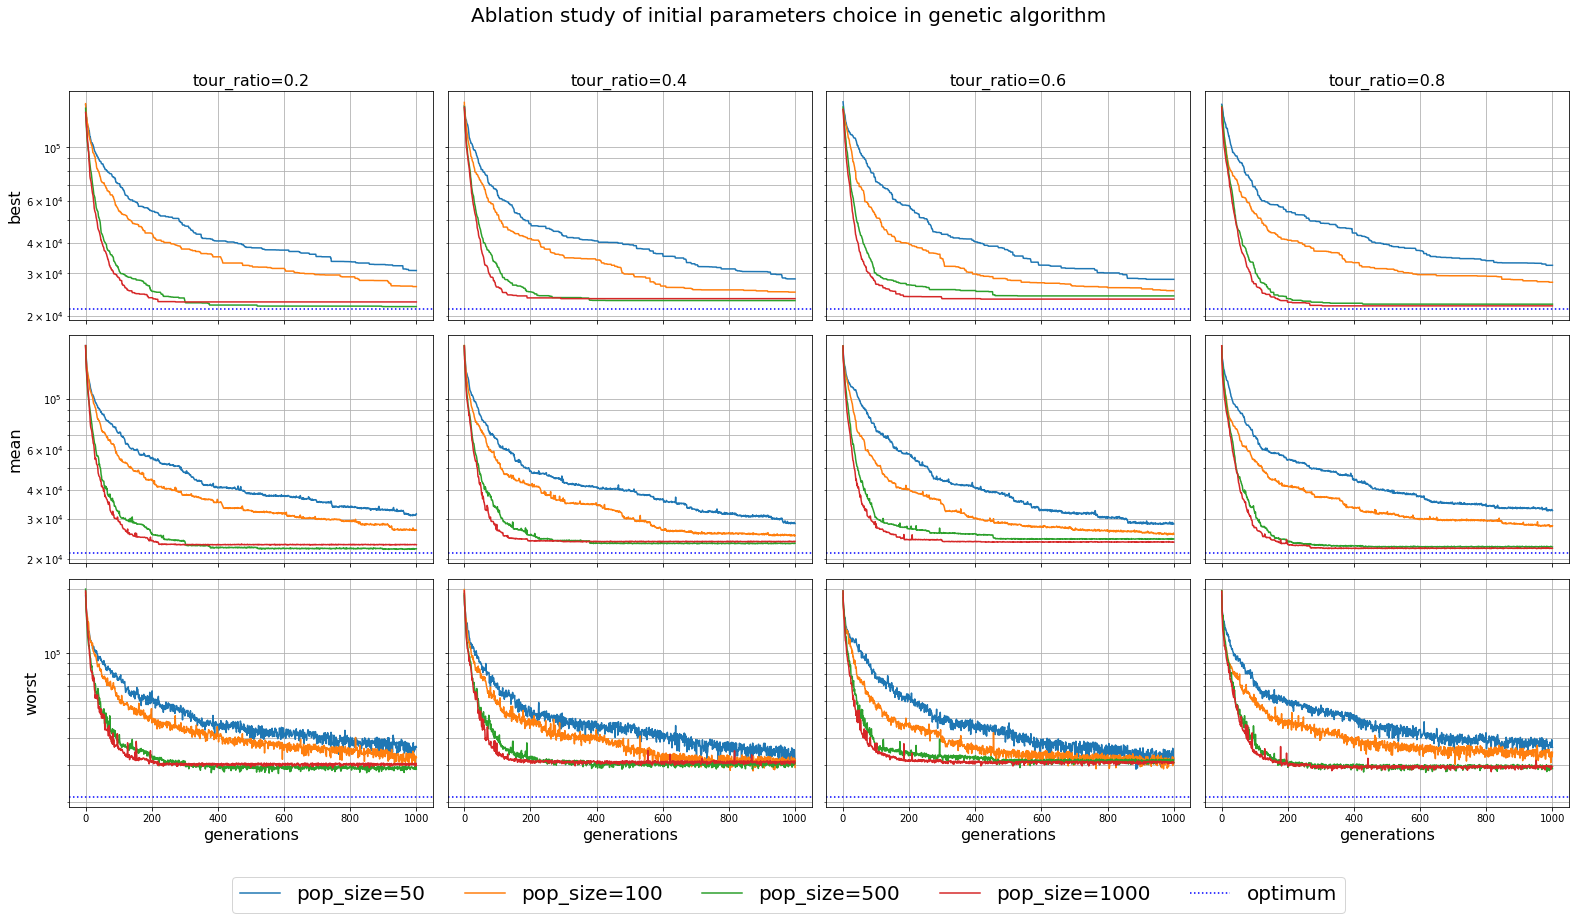

In [17]:
GENERATIONS = 1000
POP_SIZE = [50, 100, 500, 1000]
TOUR_RATIO = [0.2, 0.4, 0.6, 0.8]

# Results already collected
# benchmark_params(problem, GENERATIONS, POP_SIZE, TOUR_RATIO, csv_path=".results/benchmark-params/")
plot_benchmark_params(f".results/benchmark-params/{problem.name}.csv", optimum=problem.minimal_length)

100%|██████████| 16/16 [02:32<00:00,  9.56s/it]


Saved benchmark data at: .results/benchmark-probs/KROA100.csv


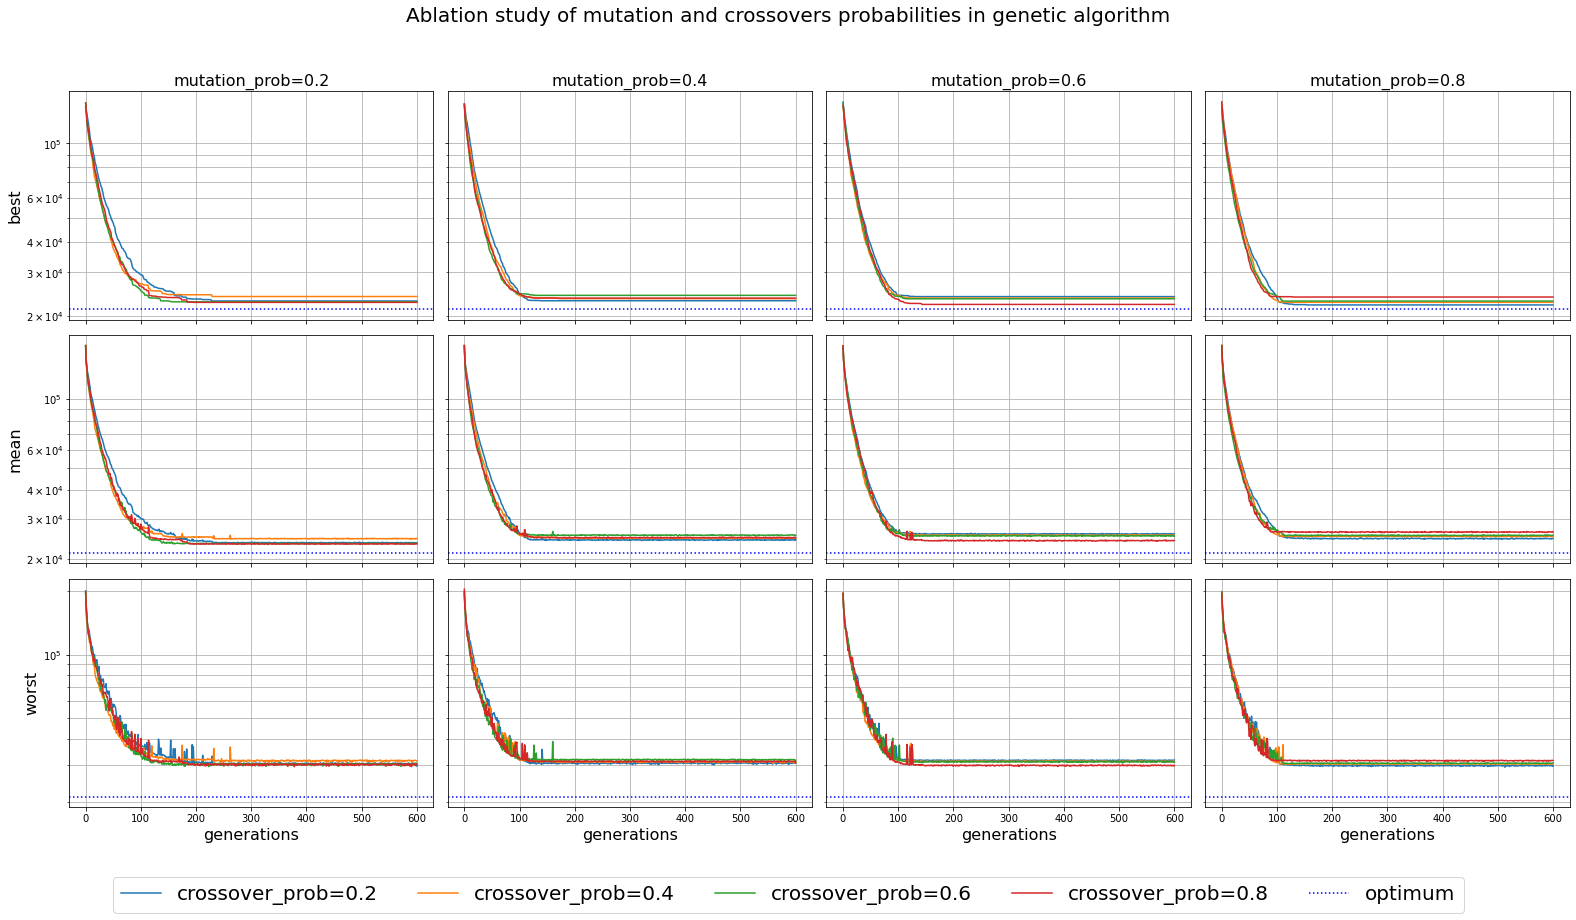

In [18]:
GENERATIONS = 600
POP_SIZE = 1000
TOUR_RATIO = 0.6

mutation_probs = [0.2, 0.4, 0.6, 0.8]
crossover_probs = [0.2, 0.4, 0.6, 0.8]

# Results already collected
# benchmark_probs(problem, GENERATIONS, POP_SIZE, TOUR_RATIO, mutation_probs, crossover_probs, csv_path=".results/benchmark-probs/")
plot_benchmark_probs(f".results/benchmark-probs/{problem.name}.csv", optimum=problem.minimal_length)

#### d) `TSP225`

In [19]:
problem = Problem.load_from_name("TSP225")

----------------------------------------------
Loaded problem: TSP225
DIMENSION = 225
MINIMAL_LENGTH = 3859.0
----------------------------------------------


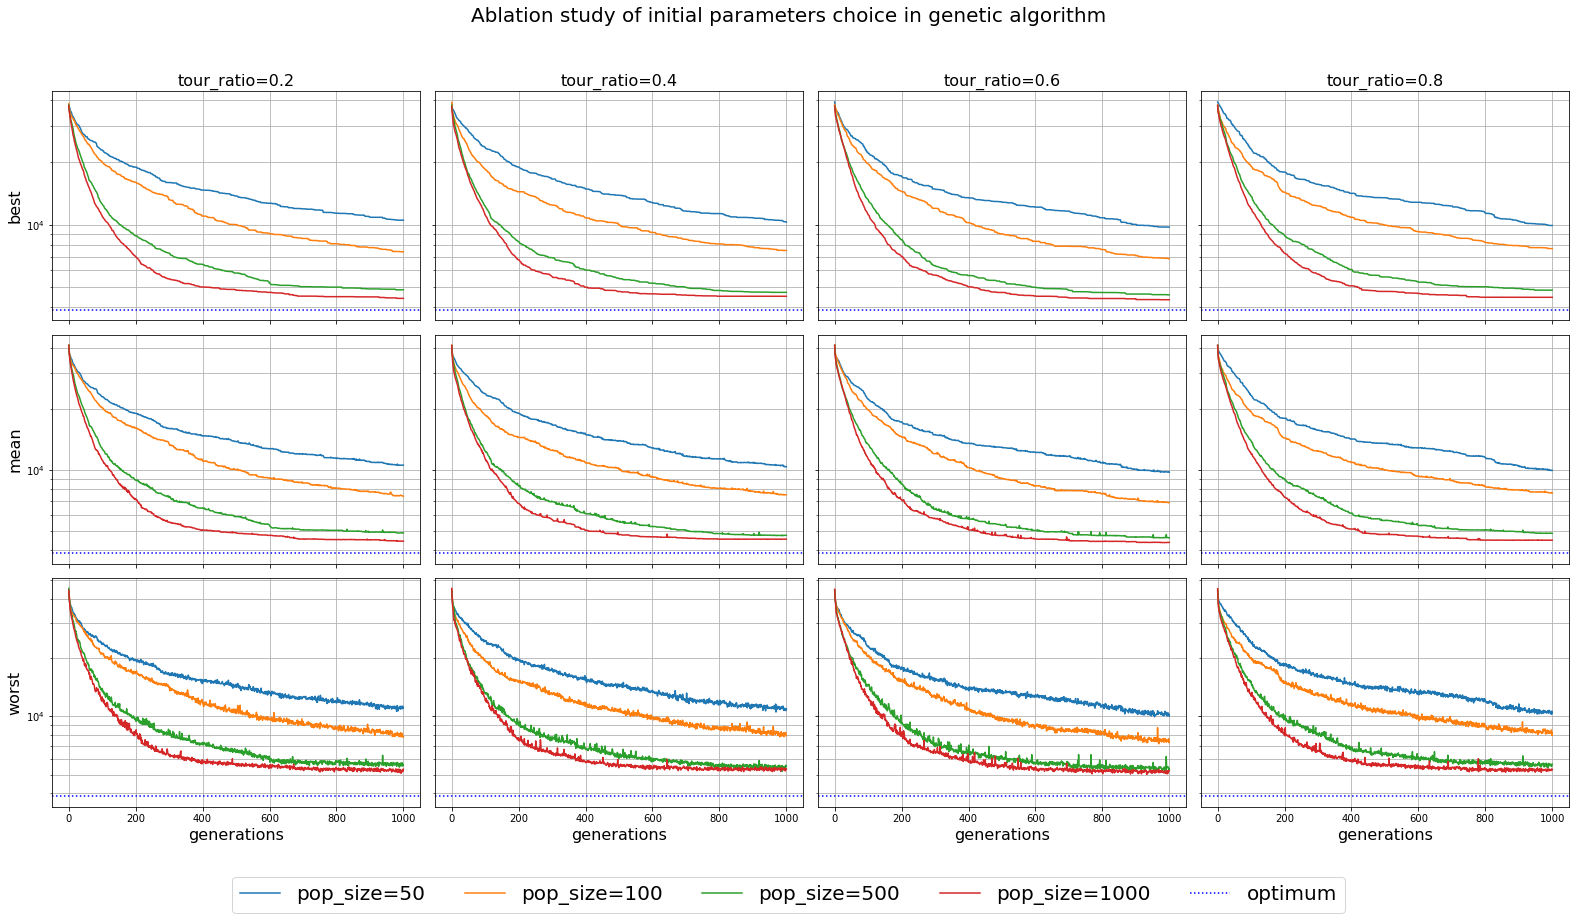

In [20]:
GENERATIONS = 1000
POP_SIZE = [50, 100, 500, 1000]
TOUR_RATIO = [0.2, 0.4, 0.6, 0.8]

# Results already collected
# benchmark_params(problem, GENERATIONS, POP_SIZE, TOUR_RATIO, csv_path=".results/benchmark-params/")
plot_benchmark_params(f".results/benchmark-params/{problem.name}.csv", optimum=problem.minimal_length)

100%|██████████| 16/16 [13:36<00:00, 51.01s/it]


Saved benchmark data at: .results/benchmark-probs/TSP225.csv


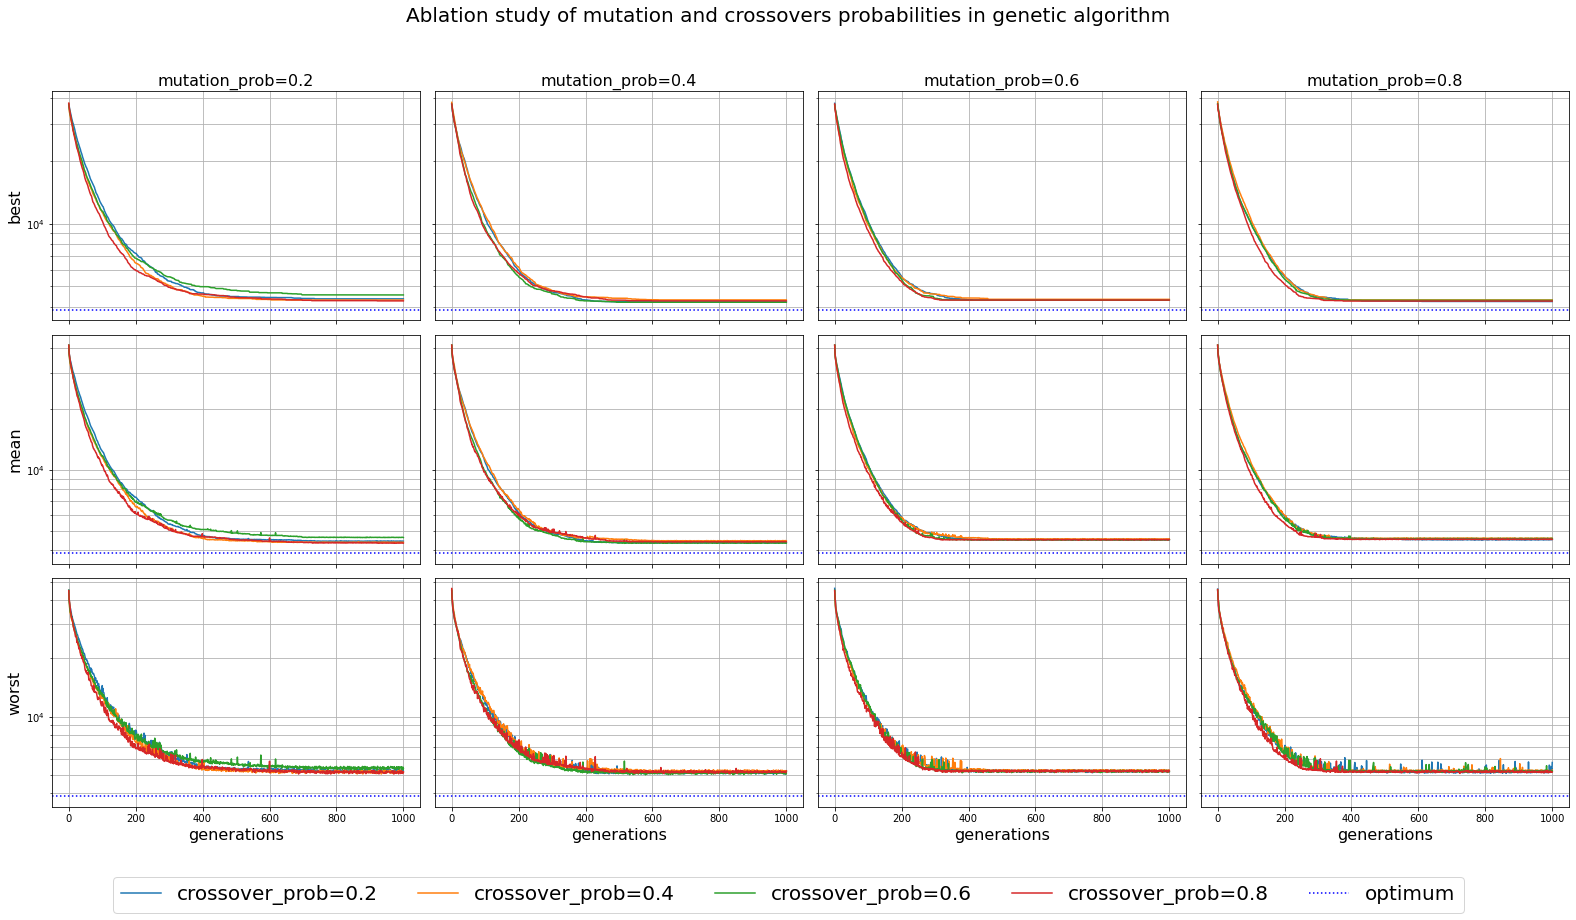

In [21]:
GENERATIONS = 1000
POP_SIZE = 1000
TOUR_RATIO = 0.6

mutation_probs = [0.2, 0.4, 0.6, 0.8]
crossover_probs = [0.2, 0.4, 0.6, 0.8]

# Results already collected
# benchmark_probs(problem, GENERATIONS, POP_SIZE, TOUR_RATIO, mutation_probs, crossover_probs, csv_path=".results/benchmark-probs/")
plot_benchmark_probs(f".results/benchmark-probs/{problem.name}.csv", optimum=problem.minimal_length)

## 2.5. Algorytm genetyczny: zebranie wyników

## 2.6. Porównanie wyników badanych heurystyk

# Pytania

### 1. Co się stanie, gdy jako rozmiar turnieju przyjmiemy 1 osobnika?

Odp: 

### 2. Co, gdy rozmiar turnieju jest równy liczności populacji?

Odp:  

### 3. Co jest ważniejsze: krzyżowanie czy mutacja?

Odp: 

### 4. Czy może być za dużo/mało mutacji?

Odp:

### 5. Czy może być za dużo/mało krzyżowania?

Odp:

### 6. Czy może być za dużo/mało osobników w populacji?

Odp:

### 7. Jak liczba pokoleń wpływa na skuteczność GA?

Odp: